## El operador $\nabla$

Sympy nos permite hacer cálculos con el operador ${\boldsymbol \nabla} $ en coordenadas cartesianas, más adelante veremos que también es posible en otros sistemas de coordenadas. Los operadores que se pueden expresar son: ${\bf grad}(gradiente)$, ${\bf div} (divergencia)$, ${\bf curl} (rotacional)$, ${\bf laplacian} (laplaciano)$. Debemos hacer uso de la biblioteca {\bf vect} para poder utilizar los operadores diferenciales. 

Veamos como funciona si queremos calcular el gradiente de la siguiente función:
$$
f=\frac{x^2+y^2}{(x^2+y^2+z^2)^{1/2}}\,.
$$


In [1]:
import sympy
from sympy import *
from sympy.vector import *
R = CoordSys3D('R')

Escribamos la función $f$

In [2]:
x,y,z = symbols('x y z')
f = (x**2+y**2)/(x**2+y**2+z**2)**(1/2)
f

(x**2 + y**2)/(x**2 + y**2 + z**2)**0.5

Los escalares base (o coordenadas) se implementan en una clase especial llamada "BaseScalar" y se asignan a cada sistema de coordenadas, uno para cada eje  $x,y$ y $z$. Estas variables de coordenadas se utilizan para formar expresiones de campos vectoriales o escalares en el espacio 3D. Se puede acceder a las coordenadas mediante las expresiones R.x, R.y y R.z respectivamente.

Por lo tanto, para generar la expresión de un campo escalar  se debe escribir de la manera siguiente 

In [3]:
f = (R.x**2+R.y**2)/(R.x**2+R.y**2+R.z**2)**(Rational(1,2))
f

(R.x**2 + R.y**2)/sqrt(R.x**2 + R.y**2 + R.z**2)

En SymPy los números racionales como un par de dos enteros: el numerador y el denominador, por lo que Rational(1,2) representa 1/2, Rational(5,2) representa 5/2 y así sucesivamente. 

Por lo tanto, si se incluyen números en una expresión de SymPy, se simpificarán automáticamente, pero hay un inconveniente que se debe tener en cuenta. Si se hace $\frac{<número>}{<número>}$ dentro de una expresión SymPy, Python evaluará los dos números antes de que SymPy tenga la oportunidad de llegar a ellos. La solución es simpificar() uno de los números, o usar la función Rational. Miremos el siguiente ejemplo:

In [4]:
x**(1/2)  # se evalúa:  x**0 or x**0.5
x**0.5

x**0.5

In [5]:
x**(S(1)/2)  # simplifica uno de los enteros
sqrt(x)

sqrt(x)

In [6]:
x**Rational(1, 2)  # se usa la clase Racional
sqrt(x)

sqrt(x)

Volvamos a escribir la función

In [7]:
f = (R.x**2+R.y**2)/(R.x**2+R.y**2+R.z**2)**(S(1)/2)
f

(R.x**2 + R.y**2)/sqrt(R.x**2 + R.y**2 + R.z**2)

In [8]:
delop = Del()
gradient = delop(f)
gradient

(Derivative((R.x**2 + R.y**2)/sqrt(R.x**2 + R.y**2 + R.z**2), R.x))*R.i + (Derivative((R.x**2 + R.y**2)/sqrt(R.x**2 + R.y**2 + R.z**2), R.y))*R.j + (Derivative((R.x**2 + R.y**2)/sqrt(R.x**2 + R.y**2 + R.z**2), R.z))*R.k

In [9]:
gradient.doit()
simplify(_)

(-R.x*(R.x**2 + R.y**2)/(R.x**2 + R.y**2 + R.z**2)**(3/2) + 2*R.x/sqrt(R.x**2 + R.y**2 + R.z**2))*R.i + (-R.y*(R.x**2 + R.y**2)/(R.x**2 + R.y**2 + R.z**2)**(3/2) + 2*R.y/sqrt(R.x**2 + R.y**2 + R.z**2))*R.j + (-R.z*(R.x**2 + R.y**2)/(R.x**2 + R.y**2 + R.z**2)**(3/2))*R.k

También se puede llamar directamente la función espécifica "gradiant"

In [10]:
from sympy.vector import gradient
gradient(f)
simplify(_)

(R.x*(R.x**2 + R.y**2 + 2*R.z**2)/(R.x**2 + R.y**2 + R.z**2)**(3/2))*R.i + (R.y*(R.x**2 + R.y**2 + 2*R.z**2)/(R.x**2 + R.y**2 + R.z**2)**(3/2))*R.j + (-R.z*(R.x**2 + R.y**2)/(R.x**2 + R.y**2 + R.z**2)**(3/2))*R.k

Hagamos uso de los otros operadores. Por ejemplo, dado el vector:
$$
{\bf A} = \frac{x^2}{x^2+y^2}\hat{i}+\frac{y^2}{x^2+y^2}\hat{j}+\frac{z^2}{x^2+y^2}\hat{k}\,,
$$
calculemos la divergencia, ${\boldsymbol \nabla} \cdot {\bf A}$. 

In [11]:
A = R.x**2/(R.x**2+R.y**2)*R.i + R.y**2/(R.x**2+R.y**2)*R.j + R.z**2/(R.x**2+R.y**2)*R.k
A 

(R.x**2/(R.x**2 + R.y**2))*R.i + (R.y**2/(R.x**2 + R.y**2))*R.j + (R.z**2/(R.x**2 + R.y**2))*R.k

In [12]:
from sympy.vector import divergence
simplify(divergence(A))

2*(-R.x**3 - R.y**3 + (R.x**2 + R.y**2)*(R.x + R.y + R.z))/(R.x**2 + R.y**2)**2

Calculemos ahora el rotacional  ${\boldsymbol \nabla} \times {\bf A}$

In [13]:
from sympy.vector import curl
simplify(curl(A))

(-2*R.y*R.z**2/(R.x**2 + R.y**2)**2)*R.i + (2*R.x*R.z**2/(R.x**2 + R.y**2)**2)*R.j + (2*R.x*R.y*(R.x - R.y)/(R.x**2 + R.y**2)**2)*R.k

Finalmente, calculemos  el laplaciano de $f$, es decir,  ${\boldsymbol \nabla}^2  f$

In [14]:
from sympy.vector import laplacian
laplacian(f)


(R.x**2 + R.y**2)*(3*R.z**2/(R.x**2 + R.y**2 + R.z**2) - 1)/(R.x**2 + R.y**2 + R.z**2)**(3/2) + (3*R.x**2*(R.x**2 + R.y**2)/(R.x**2 + R.y**2 + R.z**2)**2 - 4*R.x**2/(R.x**2 + R.y**2 + R.z**2) - (R.x**2 + R.y**2)/(R.x**2 + R.y**2 + R.z**2) + 2)/sqrt(R.x**2 + R.y**2 + R.z**2) + (3*R.y**2*(R.x**2 + R.y**2)/(R.x**2 + R.y**2 + R.z**2)**2 - 4*R.y**2/(R.x**2 + R.y**2 + R.z**2) - (R.x**2 + R.y**2)/(R.x**2 + R.y**2 + R.z**2) + 2)/sqrt(R.x**2 + R.y**2 + R.z**2)

In [15]:
simplify(_)

4*R.z**2/(R.x**2 + R.y**2 + R.z**2)**(3/2)

Podemos verificar rápidamente que: ${\boldsymbol \nabla}^2  f={\boldsymbol \nabla} \cdot {\boldsymbol \nabla} f$

In [16]:
divergence(gradient(f))

3*R.x**2*(R.x**2 + R.y**2)/(R.x**2 + R.y**2 + R.z**2)**(5/2) - 4*R.x**2/(R.x**2 + R.y**2 + R.z**2)**(3/2) + 3*R.y**2*(R.x**2 + R.y**2)/(R.x**2 + R.y**2 + R.z**2)**(5/2) - 4*R.y**2/(R.x**2 + R.y**2 + R.z**2)**(3/2) + 3*R.z**2*(R.x**2 + R.y**2)/(R.x**2 + R.y**2 + R.z**2)**(5/2) - 3*(R.x**2 + R.y**2)/(R.x**2 + R.y**2 + R.z**2)**(3/2) + 4/sqrt(R.x**2 + R.y**2 + R.z**2)

In [17]:
simplify(_)

4*R.z**2/(R.x**2 + R.y**2 + R.z**2)**(3/2)

## Integración de funciones

Sympy integra simbólicamente funciones por medio del comando **integrate** $(expr, (x, a, b))$. Esto es, calcula la integral definida de la  $expr$ respecto de $x$ con los límites de integración $a$ y $b$. Si se omiten los límites de integración se calcula la integral indefinida. 

Por ejemplo, si queremos calcular la integral:
$$
\int a \ {\sin}(x+b)^3 {d}x 
$$
Escribimos:

In [18]:
a, b = symbols('a b')
integrate(a*sin(x+b)**3,x)

a*(-sin(b + x)**2*cos(b + x) - 2*cos(b + x)**3/3)

In [19]:
factor(_)

-a*(3*sin(b + x)**2 + 2*cos(b + x)**2)*cos(b + x)/3

Calculemos ahora  el área de la región comprendida entre las funciones:
$$
f(x) = x^3-3x^2 + 1 \quad \text{y} \quad g(x) = -x+ 1 \,.
$$
Es decir, vamos a calcular la integral:
$$
\int_{a}^b [f(x)- g(x)] \mathrm{d}x \,.
$$

Aprovecharemos este ejercicio para aprender, entre otras cosas, a graficar y definir funciones. 

In [20]:
f= x**3 - 3*x**2 + 1
g= -x+1

Para encontrar los puntos donde las funciones se interceptan utilizaremos el comando {\bf solve}, que resuelve la ecuación algebraica  y devuelve una lista de igualdades con las variables despejadas. Si la expresión a resolver no es una igualdad, se supone que se quiere resolver la ecuación ya igualada a cero. 

Calculemos  los puntos donde se interceptan las curvas:

In [21]:
ec=Eq(f-g,0)
s=solve(ec,x)
s

[0, 3/2 - sqrt(5)/2, sqrt(5)/2 + 3/2]

In [22]:
[(N(expr,3)) for expr in s]

[0, 0.382, 2.62]

Haremos la gráfica de las dos funciones.

En ${\bf Sympy}$ necesario introducir las funciones como una lista, es decir, dentro de corchetes. Por otra parte, le pediremos al programa que grafique para los valores comprendidos de: $-1\leq x\leq 3$. 

Entonces, para graficar las funciones $f(x)$ y $g(x)$ entre $[-1,3]$ escribimos el siguiente comando:

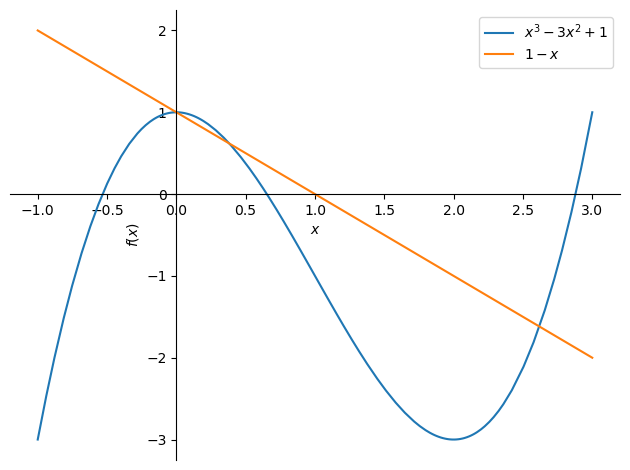

In [23]:
plot(f, g, (x, -1, 3), legend = True)

Procedemos ahora sí a integrar la función diferencia para encontrar el área contenida dentro de las dos funciones. En este caso será la integral:
$$
A=\int_{0}^{-\frac{\sqrt{5}-3}{2}} (f-g) \ \mathrm{d}x + 
\int_{-\frac{\sqrt{5}-3}{2}}^{\frac{\sqrt{5}-3}{2}} (-(f-g)) \ \mathrm{d}x \,.
$$


In [24]:
a = s[1]
b = s[2]

In [25]:
integrate(f-g,(x,0,a)) - integrate(f-g,(x,a,b))

-(sqrt(5)/2 + 3/2)**4/4 - (sqrt(5)/2 + 3/2)**2/2 - 2*(3/2 - sqrt(5)/2)**3 + (3/2 - sqrt(5)/2)**4/2 + (3/2 - sqrt(5)/2)**2 + (sqrt(5)/2 + 3/2)**3

In [26]:
round(_,2)

2.82

Calculemos ahora las dos integrales que aparecen en el ejemplo  \ref{EjemIntVectores02}. Es decir las integrales:
$$
\int_{\left(0,0\right)}^{\left(1,\frac{3}{4}\sqrt{2}\right)}
\left(3x^{2}+2xy^{3}\right)  \ \mathrm{d}x \,,\qquad 
\int_{\left(0,0\right)}^{\left(1,\frac{3}{4}\sqrt{2}\right)}6xy\ \mathrm{d}y\,.
$$
donde hicimos los cambio de variables: 
$$
x=2 t^{2}\,,\,\, y= t^{3}+ t \,\, \Rightarrow \,\,
\mathrm{d}x =4 t \mathrm{d} t \,, \,\,
\mathrm{d}y=(3 t^{2}+1) \mathrm{d} t \,.
$$

Escribiremos primero los dos integrandos:

In [27]:
dx, dy, t = symbols('dx dy t')
int1 = (3*x**2+2*x*y**3)*dx
int2 = 6*x*y*dy

Realizaremos el cambio de variable a través de comando


In [28]:
L=[(x, 2*t**2), (dx, 4*t), (y, t**3+t),(dy,3*t**2+1)]
e1 =int1.subs(L)
e2 =int2.subs(L)
e1, e2

(4*t*(12*t**4 + 4*t**2*(t**3 + t)**3), 12*t**2*(3*t**2 + 1)*(t**3 + t))

Podemos introducir las integrales sin evaluarlas en el momento. En este caso la función no es evaluada y devuelve una expresión simbólica o imagen pictórica. 

In [29]:
Integral(e1,(t,0,1/sqrt(2)))

Integral(4*t*(12*t**4 + 4*t**2*(t**3 + t)**3), (t, 0, sqrt(2)/2))

Para hacer efectivo del cálculo de la integal se puede escribir

In [30]:
(_).doit()

9305*sqrt(2)/24024 + 1

In [31]:
Integral(e2,(t,0,1/sqrt(2)))

Integral(12*t**2*(3*t**2 + 1)*(t**3 + t), (t, 0, sqrt(2)/2))

In [32]:
(_).doit()

65/32

## Funciones  en Sympy

Es hora de aclarar  la diferencia entre asignar  una expresión a una variable y la definición de funciones.

Consideremos el movimiento de una partícula que sigue la trayectoria: 
$$
x=x_0+v_0 t +\frac12 at^2 \,.
$$

Primero escribiremos la expresión y se la asignamos a una variable que llamaremos $x$. 

In [33]:
x0, v0, a, t = symbols('x0 v0 a t')
x = x0+v0*t+a*t**2/2
x

a*t**2/2 + t*v0 + x0

Si queremos evaluarla para algún valor de la variable $t$, digamos $t=1$, entonces podemos escribir:

In [34]:
x.subs(t,1)

a/2 + v0 + x0

Si queremos evaluar la expresión con el resto de parámetros podemos hacer una lista de parámetros

In [35]:
P= [(t, 1), ( a,-9.8), (x0, 0),(v0,10)]
x.subs(P)

5.10000000000000

Las sustituciones se realizan pero no se asignan a las variables.  Podemos ver que $x$ sigue siendo lo que le asignamos originalmente.

In [36]:
x

a*t**2/2 + t*v0 + x0

La velocidad y la aceleración son funciones fáciles de calcular:

In [37]:
v=diff(x,t)
v

a*t + v0

In [38]:
a=diff(x,t,2)
a

a

In [39]:
v.subs(P)

0.199999999999999

In [40]:
a.subs(P)

-9.80000000000000

Ahora definamos la expresión anterior pero como la función $x(t)$. Para definir funciones en SymPy debemos hacer lo siguiente

In [41]:
def x(t):
    return x0+v0*t+a*t**2/2

In [42]:
x(t).subs(P)

5.10000000000000

In [43]:
x(1)

a/2 + v0 + x0

In [44]:
x(t).diff(t)

a*t + v0

In [45]:
def v(t):
    return a*t+v0

In [46]:
v(1)

a + v0

In [47]:
v(t).subs(P)

0.199999999999999

Cuando necesitemos manejar campo vectoriales podemos utilizar lo aprendido hasta ahora. Veamos el primer ejemplo de \ref{EjemDerVectores01} donde:
$$
{\bf r}=3t^2 \hat{i}+(4t^3-t)\hat{j}+t\hat{k} \,.
$$
Escribamos el vector posición:

In [48]:
r = 3*t**2*R.i + (4*t**3 + -t)*R.j + t*R.k
r 

3*t**2*R.i + (4*t**3 - t)*R.j + t*R.k

In [49]:
v=r.diff(t)
v

6*t*R.i + (12*t**2 - 1)*R.j + R.k

In [50]:
a=r.diff(t,2)
a

6*R.i + 24*t*R.j

Dado u nvector arbitrario $\vec u$

In [51]:
bx, by, bz = symbols('bx by bz')
u = bx*R.i + by*R.j + bz*R.k
u

bx*R.i + by*R.j + bz*R.k

In [52]:
v.dot(u)

6*bx*t + by*(12*t**2 - 1) + bz

In [53]:
solve(_,bz)

[-6*bx*t - 12*by*t**2 + by]